<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [12]:
sac_csv = '../../data/sacramento_real_estate_transactions.csv'

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

In [13]:
df = pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [16]:
df.head()

,beds,baths,sq__ft,sale_date,price
0,2,1,836,Wed May 21 00:00:00 EDT 2008,59222
1,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212
2,2,1,796,Wed May 21 00:00:00 EDT 2008,68880
3,2,1,852,Wed May 21 00:00:00 EDT 2008,69307
4,2,1,797,Wed May 21 00:00:00 EDT 2008,81900


In [15]:
# A:
# there're rows with 0 beds, 0 bath, negtive sq__ft, negtive price
df.describe()

,beds,baths,sq__ft,price
count,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269
std,1.307932,0.895371,856.123224,139088.818896
min,0.000000,0.000000,-984.000000,-210944.000000
25%,2.000000,1.000000,950.000000,145000.000000
50%,3.000000,2.000000,1304.000000,213750.000000
75%,4.000000,2.000000,1718.000000,300000.000000
max,8.000000,5.000000,5822.000000,884790.000000


In [44]:
df[df.price<0]

,beds,baths,sq__ft,sale_date,price
703,1,1,-984,Fri May 16 00:00:00 EDT 2008,-210944


In [52]:
print(df[df.beds<0].shape[0], df[df.baths<0].shape[0])

0 0


In [53]:
df.drop(703, inplace = True)

In [54]:
for i in df.columns:
    print(i)
    print(df[i].isnull().value_counts())
# df.isnull().value_counts()

beds
False    984
Name: beds, dtype: int64
baths
False    984
Name: baths, dtype: int64
sq__ft
False    984
Name: sq__ft, dtype: int64
sale_date
False    984
Name: sale_date, dtype: int64
price
False    984
Name: price, dtype: int64


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a LR model. 

**For each of these variables you believe to be valid potential predictors in an LR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [55]:
df.head()

,beds,baths,sq__ft,sale_date,price
0,2,1,836,Wed May 21 00:00:00 EDT 2008,59222
1,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212
2,2,1,796,Wed May 21 00:00:00 EDT 2008,68880
3,2,1,852,Wed May 21 00:00:00 EDT 2008,69307
4,2,1,797,Wed May 21 00:00:00 EDT 2008,81900


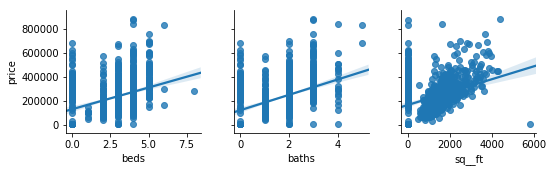

In [56]:
sns.pairplot(df, x_vars = feature_cols, y_vars = 'price', kind ='reg')

In [57]:
# A
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

feature_cols = ['beds', 'baths', 'sq__ft']
X = df[feature_cols]
y = df.price
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 4. Which variable would be the best predictor of Y in an LR model? Why?

In [5]:
# A:
sq__ft

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [64]:
# A:
def house_price(features, target):
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()

    feature_cols = features
    X = df[[feature_cols]]
    y = df[target]
    lr.fit(X,y)
    print(lr.coef_, lr.intercept_)

In [65]:
house_price('sq__ft','price')

[54.15619752] 162938.7375609862


### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A:

### Calculate the r-squared value, as well as the rmse, either by hand or through sklearn